In [37]:
# importing Libraries

import numpy as np
import pandas as pd
import pylab as pl

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [38]:
# Reading dataset
df = pd.read_csv('../dataset/FuelConsumptionCo2.csv')

# viewing first 5 rows
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Data Exploration

In [39]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [40]:
cdf = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

In [41]:
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


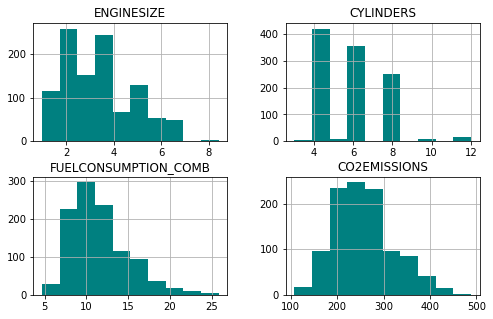

In [42]:
# plot of "cdf" dataframe
viz = cdf[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
viz.hist(figsize = (8, 5), color = 'teal')
plt.show()

### Multiple Linear Regression

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [44]:
#creating independent variable x with multiple variables
x = cdf.drop(['CO2EMISSIONS'], axis = 1)
x.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB
0,2.0,4,8.5
1,2.4,4,9.6
2,1.5,4,5.9
3,3.5,6,11.1
4,3.5,6,10.6


In [45]:
# creating y dependent variable
y = cdf['CO2EMISSIONS']
y.head()

0    196
1    221
2    136
3    255
4    244
Name: CO2EMISSIONS, dtype: int64

In [46]:
# we will use 80% of our data in training and 20% of data in testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [47]:
print("Number of Rows and Columns in Independent Train Dataset:", x_train.shape)
print("Number of Rows and Columns in Independent Test Dataset:", x_test.shape)
print("Number of Rows and Columns in Independent Test Dataset:", x_test.shape)
print("Number of Rows and Columns in Dependent Test Dataset:", y_test.shape)

Number of Rows and Columns in Independent Train Dataset: (853, 3)
Number of Rows and Columns in Independent Test Dataset: (214, 3)
Number of Rows and Columns in Independent Test Dataset: (214, 3)
Number of Rows and Columns in Dependent Test Dataset: (214,)


In [48]:
mlr = LinearRegression()

In [49]:
mlr.fit(x_train, y_train)

LinearRegression()

In [50]:
# The coefficients
print ('Coefficients: ', mlr.coef_)
print ('Intercept: ', mlr.intercept_)

Coefficients:  [11.98993058  7.54469599  8.98695981]
Intercept:  69.05220992553802


In [51]:
# creating predicted value of y using above model
# here, we are preicting test dependent variable which is y_test
# so we will give x_test as input
y_test_p = mlr.predict(x_test)

In [52]:
# here, we are preicting train dependent variable which is y_train
# so we will give x_train as input
y_train_p = mlr.predict(x_train)

In [53]:
# checking R squared value
from sklearn.metrics import r2_score

In [54]:
# R-Squared value of y_test
r2_score(y_test, y_test_p)

0.8604199405627128

In [55]:
# R-Squared value of y_train
r2_score(y_train, y_train_p)

0.8639958377437472